# Linear least-squares regression

- This notebook follows course notes `optimization-for-ml.pdf`

## Polynomial model

- We now use a polynomial model to fit the data

In [0]:
# setup python
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# plot properties
# use to create figure for tex
plt.rc('font', family='serif')
font = {'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
from cvxpy import *

In [0]:
# create a polynomial from roots
p = np.poly1d([1,-6,11,-6])

In [0]:
# generate some data
n_points = 20
np.random.seed(0)
x = np.linspace(.5,3.5,n_points)
y = p(x) + .4*np.random.randn(n_points)
y_true = p(x)

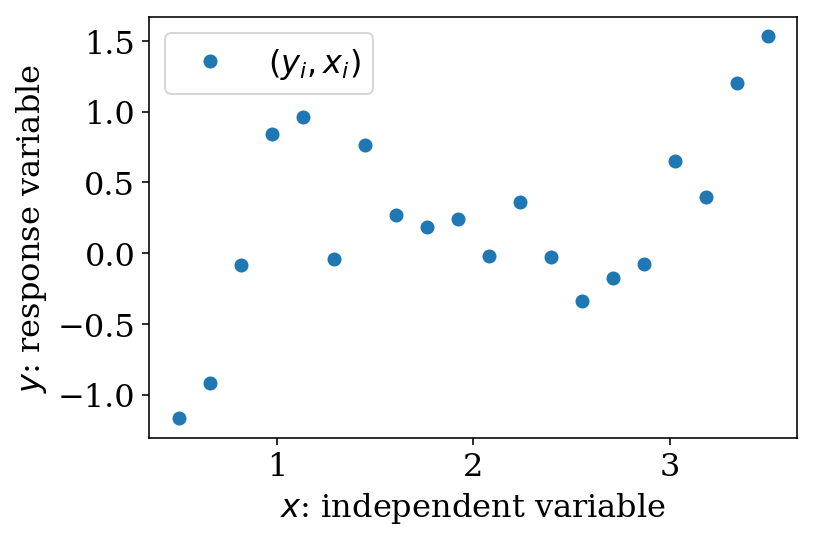

In [4]:
# plot data and underlying true function
plt.figure()
plt.plot(x,y,'o',label='$(y_i,x_i)$')
#plt.plot(x,y_true,label='$f_\mathrm{true}(x)$')
plt.xlabel('$x$: independent variable')
plt.ylabel('$y$: response variable')
plt.gcf().subplots_adjust(bottom=0.15,left=0.15)
plt.legend()

In [0]:
# define function that uses cvxpy to solve the least-squares problem using a polynomial model

def cvxpy_poly_fit(x,y,degree):
    # construct data matrix
    A = np.vander(x,degree+1)
    b = y
    beta_cvx = Variable(degree+1)
    # set up optimization problem
    objective = Minimize(sum_squares(A*beta_cvx - b))
    constraints = []
    # solve the problem
    prob = Problem(objective,constraints)
    prob.solve()
    # return the polynomial coefficients
    return (np.array(beta_cvx.value),prob.value)
    

In [0]:
# fit the polynomial models of degrees 1 to 3 using cvxpy
(c1,c1_objective_value) = cvxpy_poly_fit(x,y,1)
(c2,c2_objective_value) = cvxpy_poly_fit(x,y,2)
(c3,c3_objective_value) = cvxpy_poly_fit(x,y,3)

p1 = np.poly1d(c1.flatten())
p2 = np.poly1d(c2.flatten())
p3 = np.poly1d(c3.flatten())

y1 = p1(x)
y2 = p2(x)
y3 = p3(x)

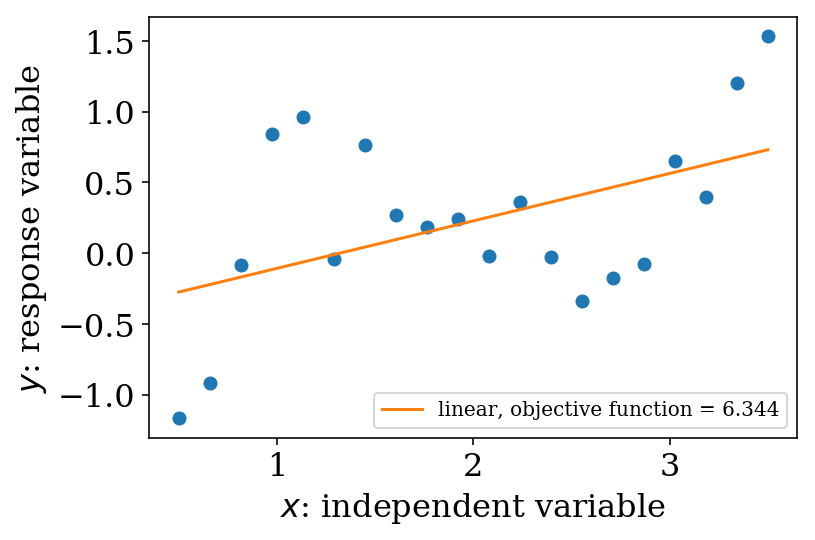

In [7]:
# plot linear (p=1) fit
plt.figure()
plt.plot(x,y,'o')
plt.plot(x,y1,label='linear, objective function = {:.5}'.format(c1_objective_value))
plt.legend(loc=4,fontsize=10)
plt.xlabel('$x$: independent variable')
plt.ylabel('$y$: response variable')
plt.gcf().subplots_adjust(bottom=0.15,left=0.15)

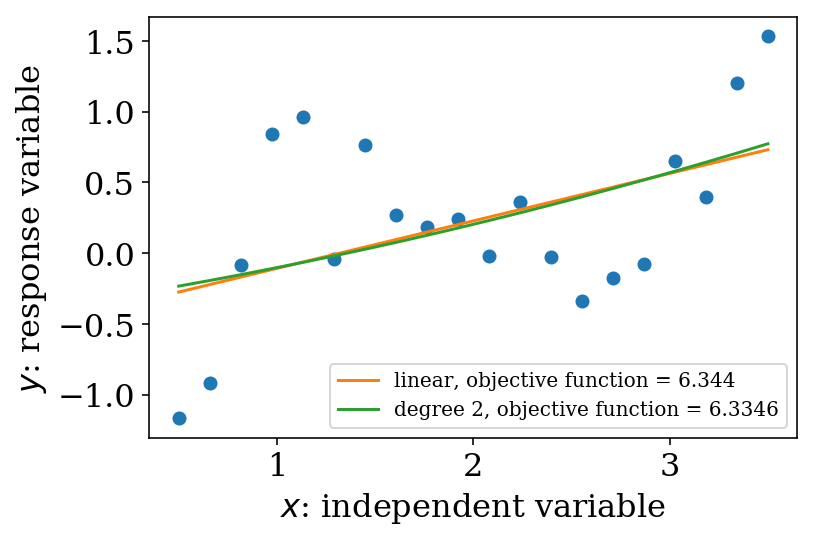

In [8]:
# plot quadratic (p=2) fit
plt.figure()
plt.plot(x,y,'o')
plt.plot(x,y1,label='linear, objective function = {:.5}'.format(c1_objective_value))
plt.plot(x,y2,label='degree 2, objective function = {:.5}'.format(c2_objective_value))
plt.legend(loc=4,fontsize=10)
plt.xlabel('$x$: independent variable')
plt.ylabel('$y$: response variable')
plt.gcf().subplots_adjust(bottom=0.15,left=0.15)

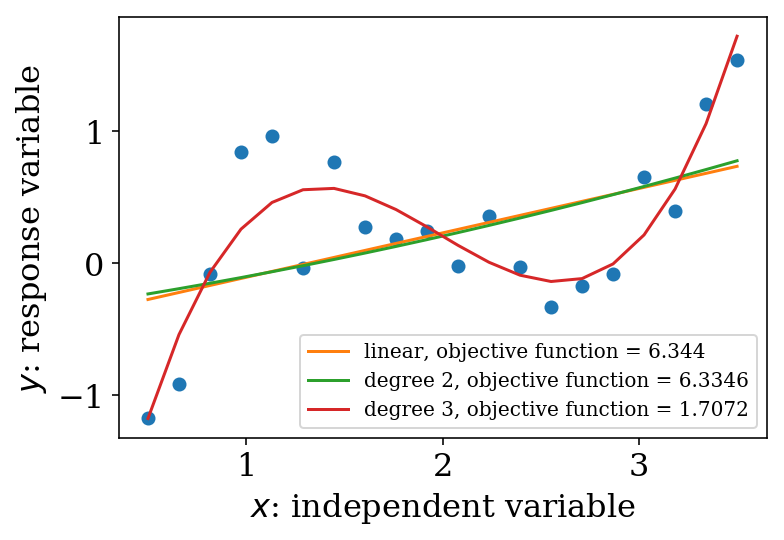

In [9]:
# plot cubic (p=3) fit
plt.figure()
plt.plot(x,y,'o')
plt.plot(x,y1,label='linear, objective function = {:.5}'.format(c1_objective_value))
plt.plot(x,y2,label='degree 2, objective function = {:.5}'.format(c2_objective_value))
plt.plot(x,y3,label='degree 3, objective function = {:.5}'.format(c3_objective_value))
plt.legend(loc=4,fontsize=10)
plt.xlabel('$x$: independent variable')
plt.ylabel('$y$: response variable')
plt.gcf().subplots_adjust(bottom=0.15,left=0.15)

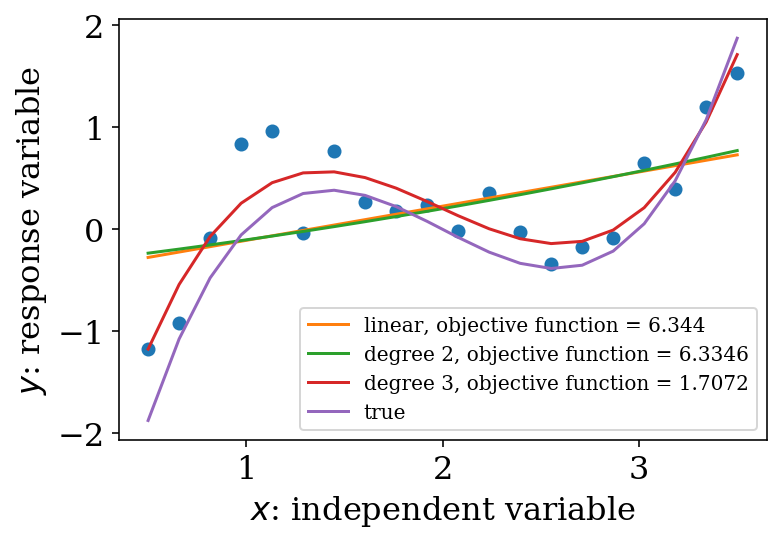

In [10]:
# plot all
plt.figure()
plt.plot(x,y,'o')
plt.plot(x,y1,label='linear, objective function = {:.5}'.format(c1_objective_value))
plt.plot(x,y2,label='degree 2, objective function = {:.5}'.format(c2_objective_value))
plt.plot(x,y3,label='degree 3, objective function = {:.5}'.format(c3_objective_value))
plt.plot(x,y_true,label='true')
plt.legend(loc=4,fontsize=10)
plt.xlabel('$x$: independent variable')
plt.ylabel('$y$: response variable')
plt.gcf().subplots_adjust(bottom=0.15,left=0.15)